# Machine learning Mini Project :-
## Content Based Recommendation System(Zomato Data) :

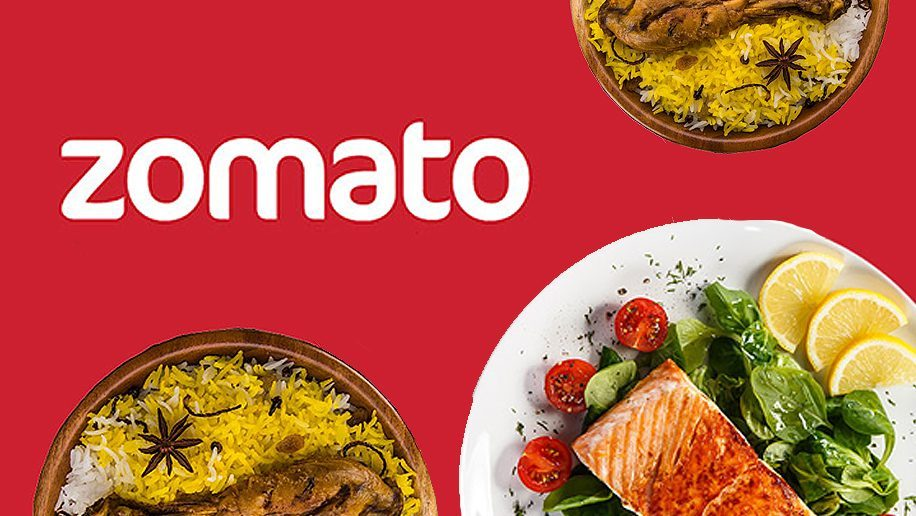

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Zomato\\Z0.jpg")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
zomato_data = pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\zomato.csv")
zomato_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
print('Total number of restaurants are = {}'.format(zomato_data['name'].nunique()))

Total number of restaurants are = 8792


In [5]:
zomato_data.duplicated().sum()

0

In [6]:
zomato_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
zomato_data.dropna(axis=0,inplace=True)

In [8]:
zomato_data.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [9]:
zomato_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,https://www.zomato.com/bangalore/izakaya-gastr...,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [10]:
zomato_data.shape

(23193, 17)

In [11]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23193 non-null  object
 1   address                      23193 non-null  object
 2   name                         23193 non-null  object
 3   online_order                 23193 non-null  object
 4   book_table                   23193 non-null  object
 5   rate                         23193 non-null  object
 6   votes                        23193 non-null  int64 
 7   phone                        23193 non-null  object
 8   location                     23193 non-null  object
 9   rest_type                    23193 non-null  object
 10  dish_liked                   23193 non-null  object
 11  cuisines                     23193 non-null  object
 12  approx_cost(for two people)  23193 non-null  object
 13  reviews_list                 23

In [12]:
zomato_data.rename(columns={'rate':'rate(/5)'},inplace=True)


In [13]:
zomato_data[zomato_data['rate(/5)']=='NEW']=np.nan
zomato_data['rate(/5)']=(zomato_data['rate(/5)'].replace('/5','',regex=True).astype(float))
zomato_data['approx_cost(for two people)']=(zomato_data['approx_cost(for two people)'].replace(',','',regex=True).astype(float))
df1=zomato_data[['name','online_order','book_table','rate(/5)','votes','approx_cost(for two people)',
                'reviews_list','listed_in(city)','address']]
df1


,name,online_order,book_table,rate(/5),votes,approx_cost(for two people),reviews_list,listed_in(city),address
0,Jalsa,Yes,Yes,4.1,775.0,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,Spice Elephant,Yes,No,4.1,787.0,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,San Churro Cafe,Yes,No,3.8,918.0,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,"1112, Next to KIMS Medical College, 17th Cross..."
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,Grand Village,No,No,3.8,166.0,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."
...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128.0,1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",Whitefield,"2nd Floor, Iona, Virginia Mall, Whitefield Mai..."
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77.0,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",Whitefield,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A..."
51708,Keys Cafe - Keys Hotel,No,No,2.8,161.0,1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",Whitefield,"Keys Hotel, 6, 1st Phase Industrial Area, Near..."
51711,Bhagini,No,No,2.5,81.0,800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Whitefield,"139/C1, Next To GR Tech Park, Pattandur Agraha..."


In [14]:
df1.dropna(axis=0,inplace=True)

In [15]:
df1.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate(/5)                       0
votes                          0
approx_cost(for two people)    0
reviews_list                   0
listed_in(city)                0
address                        0
dtype: int64

In [16]:
df1.shape

(23046, 9)

In [17]:
df1['online_order'].value_counts()

Yes    16297
No      6749
Name: online_order, dtype: int64

In [18]:
df1['book_table'].value_counts()

No     17005
Yes     6041
Name: book_table, dtype: int64

# Count of online orders and table booking :

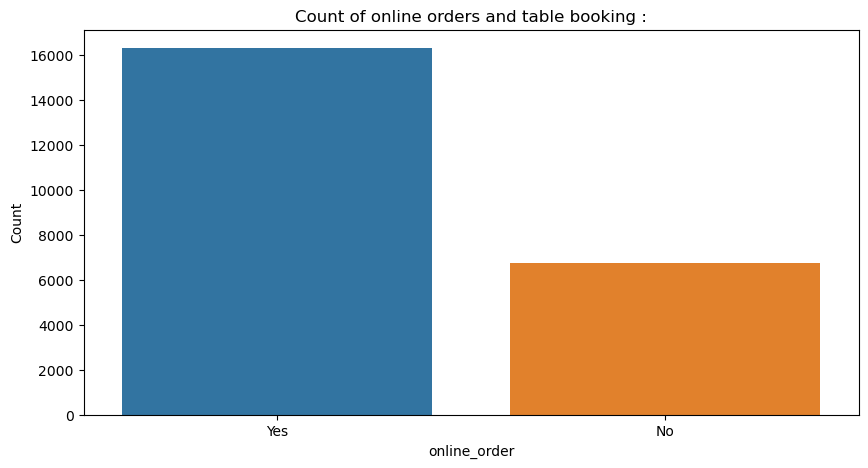

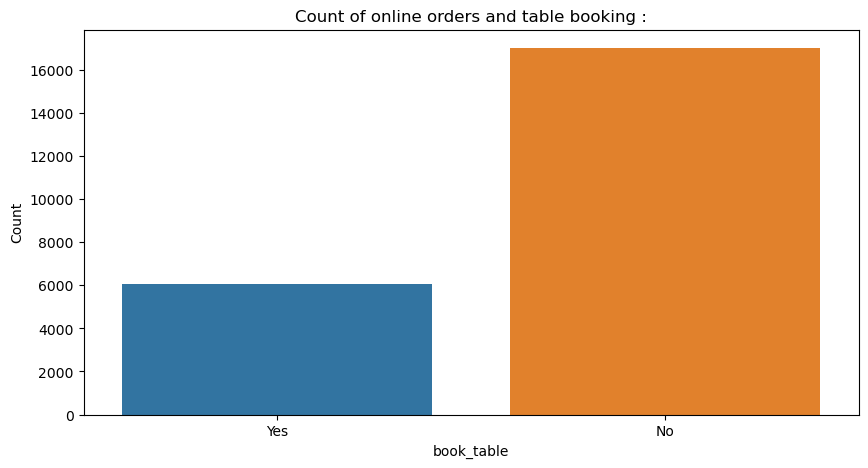

In [19]:
for o in df1[['online_order','book_table']]:
    plt.figure(figsize=(10,5))
    sns.countplot(df1[o])
    plt.title('Count of online orders and table booking :')
    plt.xlabel(o)
    plt.ylabel('Count')
    plt.show()

# Count of ratings and votes :

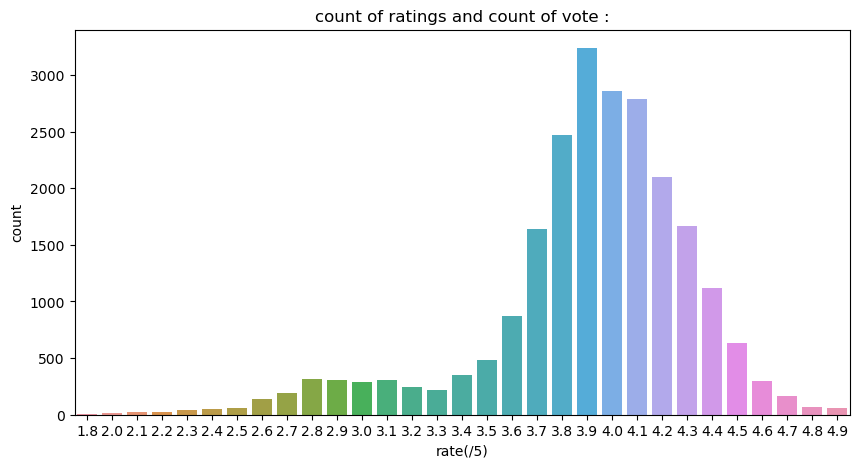

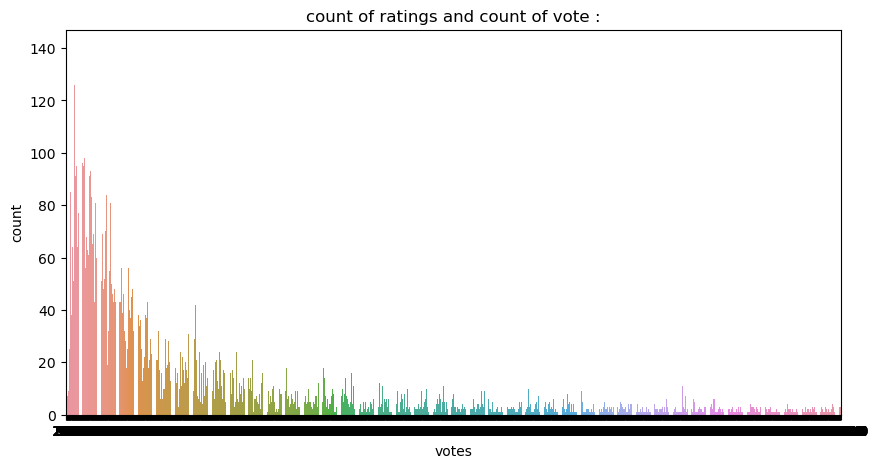

In [20]:
for rv in df1.iloc[:,3:5]:
    plt.figure(figsize=(10,5))
    sns.countplot(df1[rv])
    plt.title('count of ratings and count of vote :')
    plt.xlabel(rv)
    plt.ylabel('count')
    plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for z in df1.iloc[:,1:3]:
    df1[z]=lab.fit_transform(df1[z])   

In [22]:
df1

,name,online_order,book_table,rate(/5),votes,approx_cost(for two people),reviews_list,listed_in(city),address
0,Jalsa,1,1,4.1,775.0,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,Spice Elephant,1,0,4.1,787.0,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,San Churro Cafe,1,0,3.8,918.0,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,"1112, Next to KIMS Medical College, 17th Cross..."
3,Addhuri Udupi Bhojana,0,0,3.7,88.0,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,Grand Village,0,0,3.8,166.0,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."
...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,1,1,3.8,128.0,1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",Whitefield,"2nd Floor, Iona, Virginia Mall, Whitefield Mai..."
51707,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77.0,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",Whitefield,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A..."
51708,Keys Cafe - Keys Hotel,0,0,2.8,161.0,1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",Whitefield,"Keys Hotel, 6, 1st Phase Industrial Area, Near..."
51711,Bhagini,0,0,2.5,81.0,800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",Whitefield,"139/C1, Next To GR Tech Park, Pattandur Agraha..."


In [23]:
df1.describe()

,online_order,book_table,rate(/5),votes,approx_cost(for two people)
count,23046.000000,23046.000000,23046.000000,23046.000000,23046.000000
mean,0.707151,0.262128,3.904383,604.908444,754.299662
std,0.455080,0.439801,0.426365,1117.367014,521.538416
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.800000,103.000000,400.000000
50%,1.000000,0.000000,4.000000,224.000000,600.000000
75%,1.000000,1.000000,4.200000,591.000000,1000.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


# Distribution :

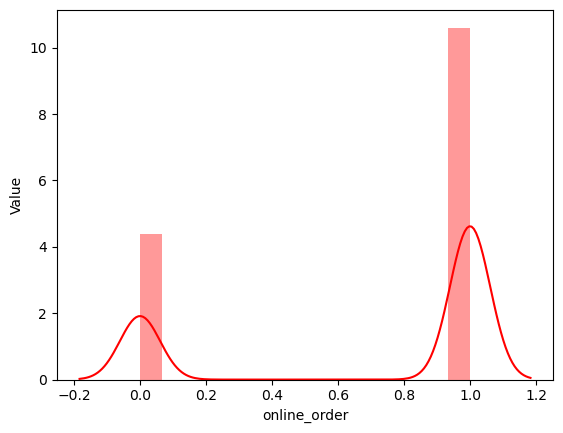

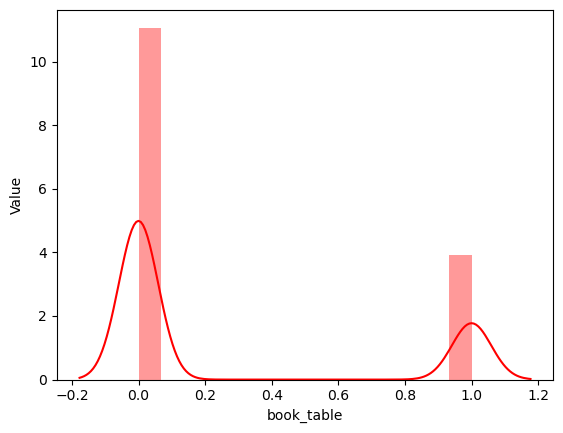

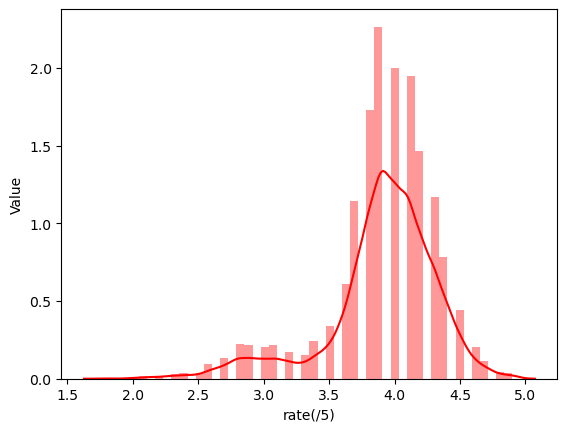

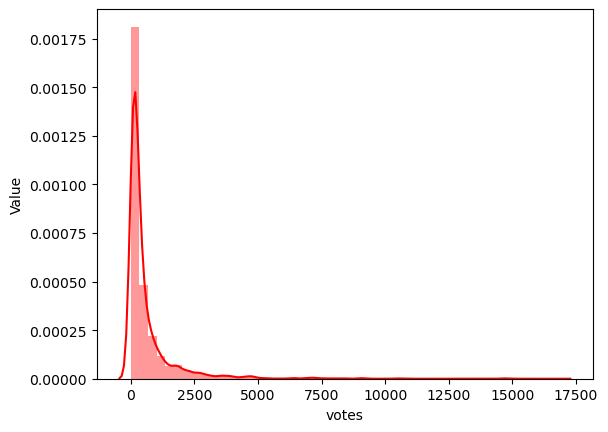

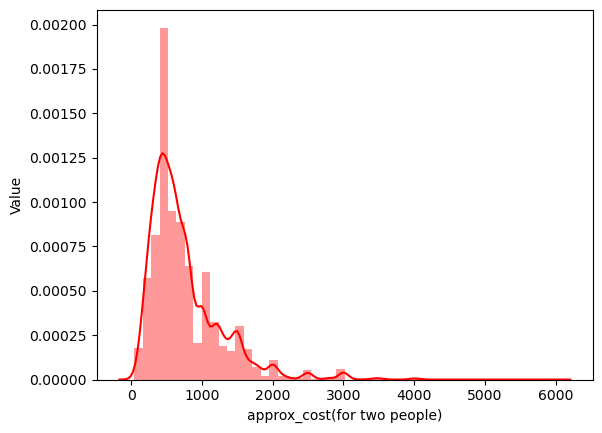

In [24]:
for i in df1.columns:
    if df1[i].dtype != 'object':
        sns.distplot(df1[i],color='red')
        plt.xlabel(i)
        plt.ylabel('Value')
        plt.show()

In [25]:
df3=df1.copy()
df3['name'].nunique()


3142

# Text Vectorization :

In [26]:
df5=df3.loc[(df3['rate(/5)']>=3.8) & (df3['votes']>=500)]
df5['name'].nunique()

734

In [27]:
df9=df5[['name','reviews_list','address']]
df8=df5[['name','approx_cost(for two people)']]
df10=df9.groupby('name').max()
df10a=df8.groupby('name').mean()
df10['name']=df10.index
df10a['name']=df10a.index
df11=pd.DataFrame({'name':df10['name'].values,'reviews':df10['reviews_list'].values,
                   'address':df10['address'].values,'approx_cost(for two people)':df10a['approx_cost(for two people)'].values})

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfif=TfidfVectorizer(stop_words='english',token_pattern=r'\w{1,}',
                    max_df=3,strip_accents='unicode',analyzer='word',
                    ngram_range=(1,3))
mat1=tfif.fit_transform(df11['reviews'])

In [30]:
mat1.shape

(734, 843577)

In [31]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig1=sigmoid_kernel(mat1,mat1)

In [32]:
ind1=pd.Series(df11.index,index=df11['name'])
ind1

name
1131 Bar + Kitchen                0
1522 - The Pub                    1
154 Breakfast Club                2
1947                              3
1Q1                               4
                               ... 
Zhang's - Chinese Restaurant    729
Zingron                         730
Zoey's                          731
alt                             732
i-Bar - The Park Bangalore      733
Length: 734, dtype: int64

# The Model :

In [33]:
name1=input('Enter the restaurant name : ')
idx1=ind1[name1]
sig_sc1=list(enumerate(sig1[idx1]))
sig_sc1=sorted(sig_sc1,key=lambda w:w[1],reverse=True)
sig_sc1=sig_sc1[1:11]
m1=[x[0] for x in sig_sc1]
df12=df11[['name','address','approx_cost(for two people)']].iloc[m1]
print('Here are some restaurants similer to your search')
df12

Enter the restaurant name : 1522 - The Pub
Here are some restaurants similer to your search


,name,address,approx_cost(for two people)
48,BAR BAR,"Level 2, Phoenix Marketcity, Whitefield, Banga...",1500.0
482,Punjabi Nawabi,"Shop 78/4, Ground Floor, Opposite Airtel Offic...",500.0
657,The Rasoiya Street,"Florus, 3rd Floor, Above Apollo Clinic, Opposi...",800.0
52,BYLI - Bet You Love It!,"G-1/2, First Avenue, 5th Main, 2nd Block, HRBR...",800.0
9,3G's - Gulp & Groove,"343, 8th A Main Road, Milk Colony, Subramanyan...",1100.0
289,Hotel Fanoos,"17, Hosur Road, Near Johnson Market, Richmond ...",400.0
658,The Reservoire,"17th Main Road, JNC Road, Koramangala 5th Bloc...",1300.0
342,Konark Vegetarian Restaurant,"50, Field Marshal Cariappa Road, Residency Roa...",500.0
225,Euki,"1557, Divya Towers, 11th Main Road, 4th T Bloc...",900.0
100,Bob's Bar,"777/i, Opposite New Horizon School, HAL 2nd St...",1000.0


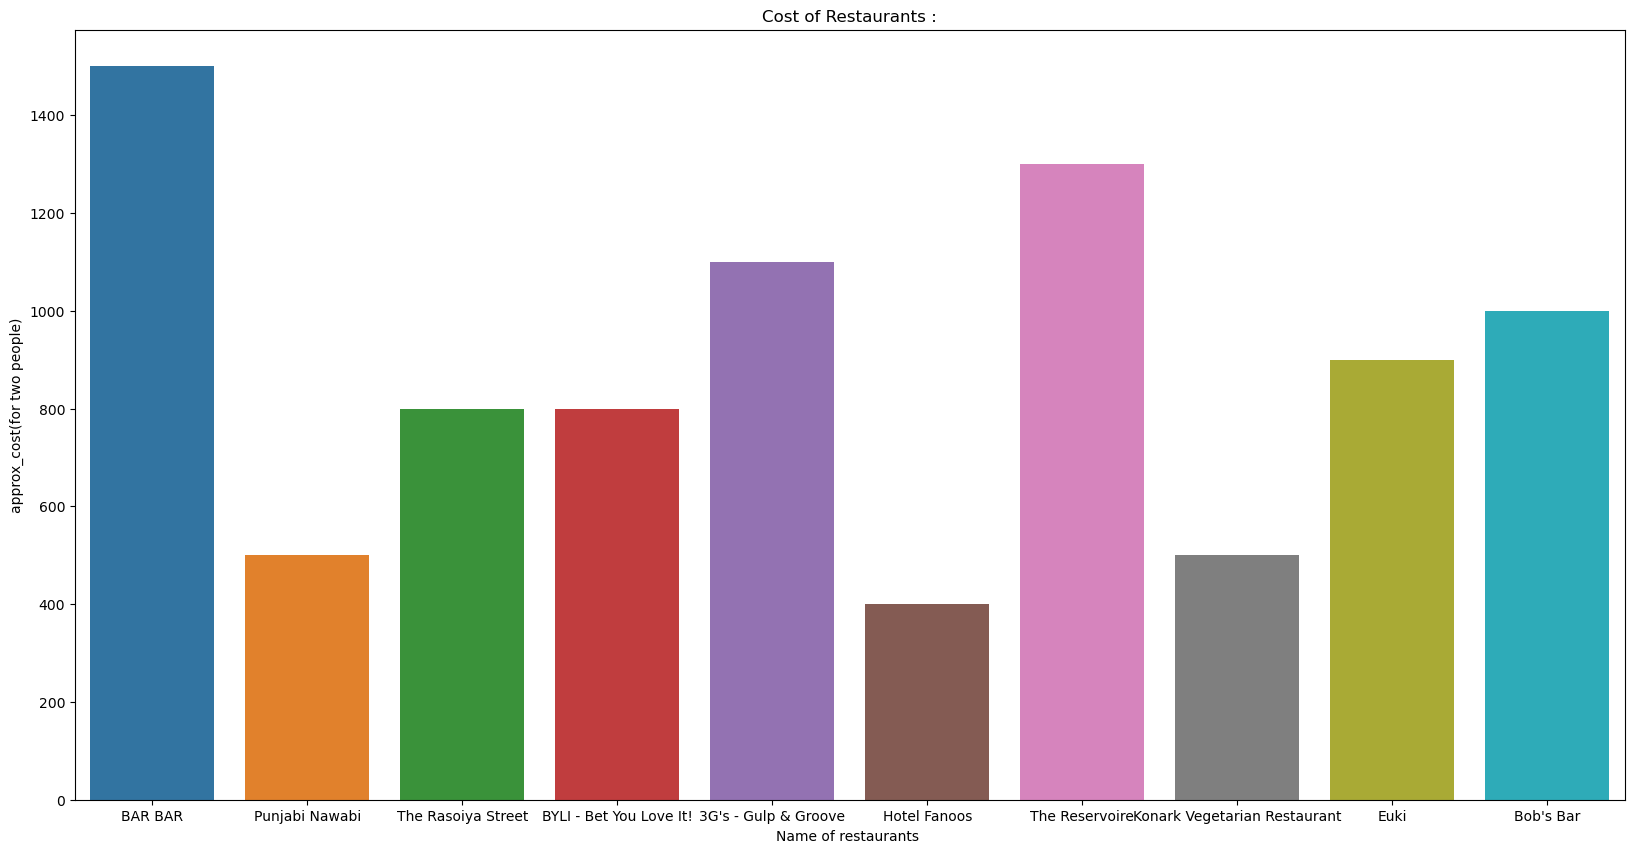

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(df12['name'],df12['approx_cost(for two people)'])
plt.title('Cost of Restaurants :')
plt.xlabel('Name of restaurants ')
plt.ylabel('approx_cost(for two people)')
plt.show()